In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import operator
import copy
%matplotlib inline

# initialization

In [140]:
population = []
group_size = 50
select_num = 20
bit_num = 6
group_str = np.ones((1, bit_num), dtype=np.float) * 0.5

for i in range(group_size):
    temp = random.sample(range(2**bit_num), 1)[0]
    temp = bin(temp)[2:]
    while(len(temp)<bit_num):
        temp = '0' + temp
    population.append([temp, int(temp, 2)])

# update fitness and select

In [141]:
def uf(group_str):
    count = np.zeros((1, bit_num), dtype=np.float)
    for i in range(group_size):
        # update fitness
        population[i][1] = int(population[i][0], 2)
        
    # sort
    population.sort(key=operator.itemgetter(-1), reverse=True)
    
    # select
    for i in range(group_size-select_num):
        del(population[-1])
        
    for i in range(select_num):
        # update group string
        for j in range(bit_num):
            count[0][j] += (population[i][0][j]=='1')
    # incremental update
    group_str = group_str * 0.9 + 0.1 * count / float(select_num)
    
    return group_str

# crossover and mutate

In [142]:
def cnm():
    for i in range(group_size-select_num):
        cross_idx = random.sample(range(select_num), 2)
        temp = population[cross_idx[0]][0][:-3] + population[cross_idx[1]][0][-3:]
        if(random.random() < 0.1):
            mut_idx = random.sample(range(bit_num), 1)[0]
            temp = temp[:mut_idx] + str(int(not bool(int(temp[mut_idx])))) + temp[mut_idx+1:]

        population.append([temp, 0])

# main

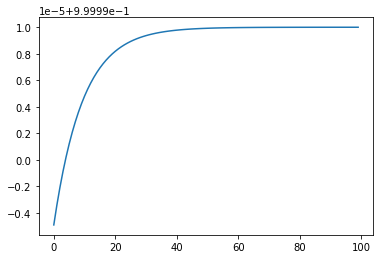

In [145]:
if __name__ == "__main__":
    optimal = []
    for h in range(100):
        optimal.append(np.mean(group_str))
        group_str = uf(group_str)
        cnm()
    plt.plot(optimal)